# UofT Routing using Hill Climbing Algorithm

In [1]:
import osmnx
from optalgotools.routing import (cost, draw_route, get_child, randomized_search)
from optalgotools.structures import Node, Solution
from itertools import islice
from sys import getsizeof
from time import process_time
import matplotlib.pyplot as plt

### Set points of interest

In [2]:
# Set up King's College Cir, Toronto, ON as a reference
reference = (43.661667, -79.395)
G = osmnx.graph_from_point(reference, dist=300, clean_periphery=True, simplify=True)

# Set up the points
origin = (43.664527, -79.392442) # King Edward VII Equestrian Statue
destination = (43.659659, -79.397669) # Bahen Centre for Information Technology at UofT

# Get the osmid of the nearest nodes to the points
origin_id = osmnx.distance.nearest_nodes(G, origin[1], origin[0])
destination_id = osmnx.distance.nearest_nodes(G, destination[1], destination[0])

# Convert the source and destination nodes to Node
origin = Node(graph=G, osmid=origin_id)
destination = Node(graph=G, osmid=destination_id)

### Hill climbing algorithm

In [4]:
def Hill_Climbing(G, origin, destination, n):
    time_start = process_time()  # Time tracking

    # Visualize the costs over time
    costs = []

    current = randomized_search(G, origin.osmid, destination.osmid)
    costs.append(cost(G, current))
    print("Initial cost:", costs[0])

    neighbours = list(islice(get_child(G, current), n))
    space_required = getsizeof(neighbours)
    shortest = min(neighbours, key=lambda route: cost(G, route))

    print("Initial min(children):", cost(G, shortest))
    while cost(G, shortest) < cost(G, current):
        current = shortest
        neighbours = list(islice(get_child(G, current), n))
        shortest = min(neighbours, key=lambda route: cost(G, route))
        costs.append(cost(G, current))
        print(f"Current cost:", costs[-1], "|", "min(children):", cost(G, shortest))

    route = current
    time_end = process_time()  # Time tracking
    return Solution(route, time_end - time_start, space_required, costs)

# Find the shortest route

Initial cost: 1185.848
Initial min(children): 838.424
Current cost: 838.424 | min(children): 821.437
Current cost: 821.437 | min(children): 832.316
Cost: 821.437 m
Process time: 92.140625 s
Space required: 920 bytes


Text(0.5, 0, 'Iteration')

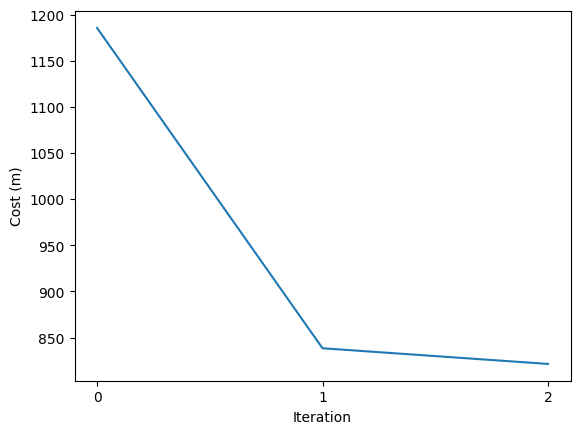

In [5]:
solution = Hill_Climbing(G, origin, destination, 100)
route = solution.result
print(f"Cost: {cost(G,route)} m")
print(f"Process time: {solution.time} s")
print(f"Space required: {solution.space} bytes")
plt.plot(solution.explored)
plt.xticks(list(range(len(solution.explored))))
plt.ylabel("Cost (m)")
plt.xlabel("Iteration")

### Draw the shortest route

In [6]:
draw_route(G,route)